In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/amazon-sales-data/Amazon Sales data.csv')

***Data Cleaning and Preparation***
* Check for any missing or null values in the dataset and handle them appropriately, either by removing or imputing the data.
* Ensure consistency in data types and formats across columns.
* Check for and remove duplicate entries if any.

In [3]:
df.shape

(100, 14)

In [4]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [6]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Sales Channel'] = pd.Categorical(df['Sales Channel'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Region'] = pd.Categorical(df['Region'])
df['Item Type'] = pd.Categorical(df['Item Type'])
df['Order Priority'] = pd.Categorical(df['Order Priority'])

***Exploratory Data Analysis (EDA)***
* Explore the distribution of sales across different regions, countries, item types, sales channels, etc.
* Analyze the trends over time by looking at sales patterns across different order dates.
* Investigate the relationship between order priority and sales performance.
* Look for any outliers or anomalies in the data that might need further investigation.

In [7]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')

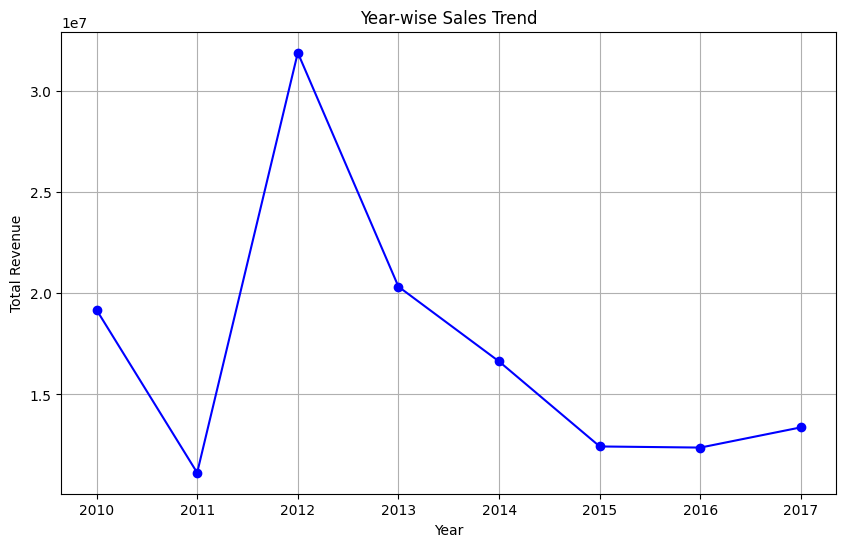

In [8]:
# Year-Wise Sales Trend
import matplotlib.pyplot as plt

# Aggregate data by year
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

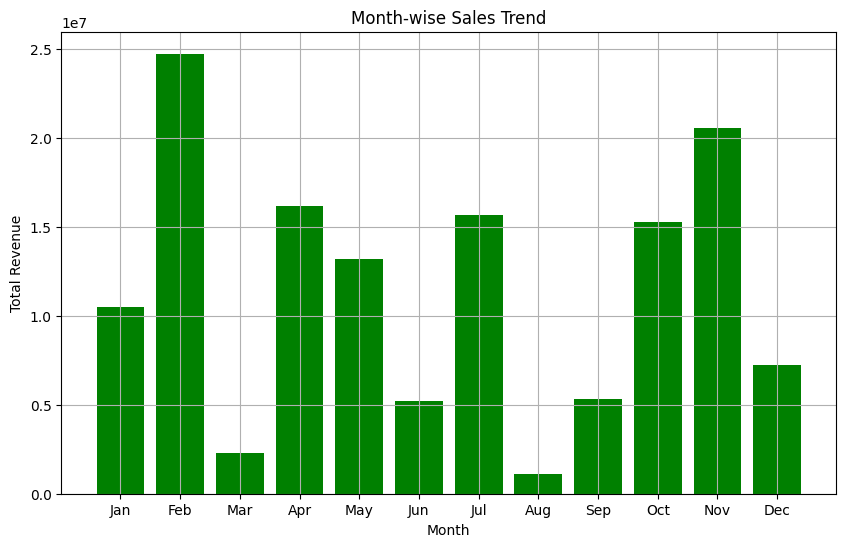

In [9]:
# Month-Wise Sales Trends
# Aggregate data by month
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(monthly_sales.index, monthly_sales.values, color='g')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(monthly_sales.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

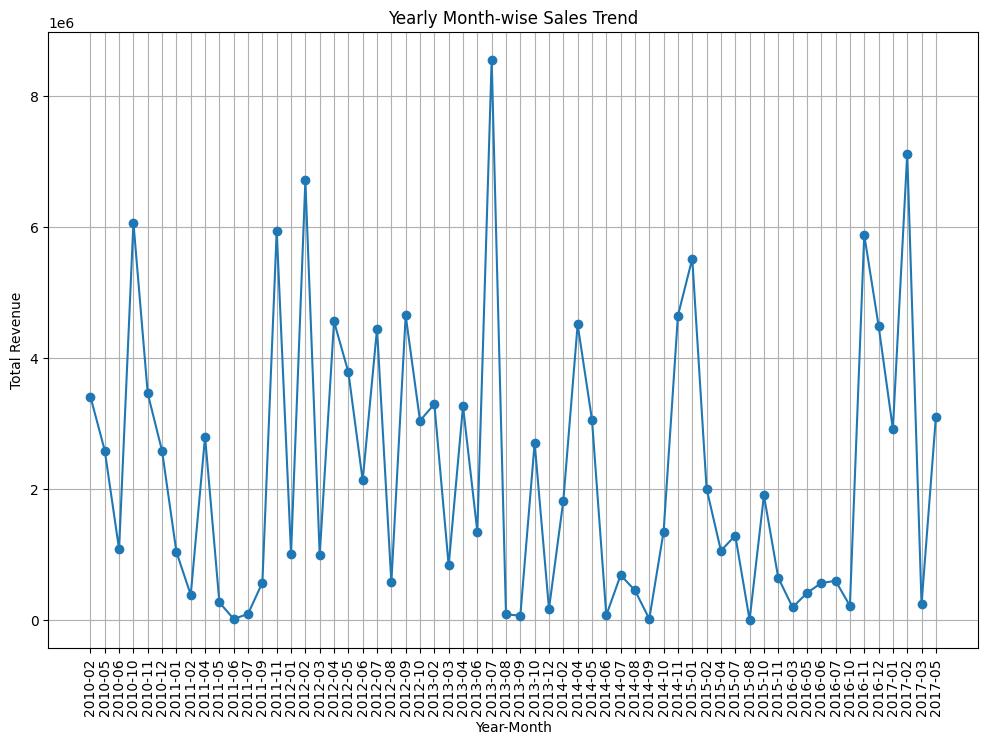

In [10]:
# Yearly Month-Wise Sales Trend
# Convert 'Year_Month' to string for grouping
df['Year_Month_Str'] = df['Year_Month'].astype(str)

# Aggregate data by new 'Year_Month_Str'
yearly_monthly_sales = df.groupby('Year_Month_Str')['Total Revenue'].sum()

# Plotting
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(yearly_monthly_sales.index, yearly_monthly_sales.values, marker='o', linestyle='-')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

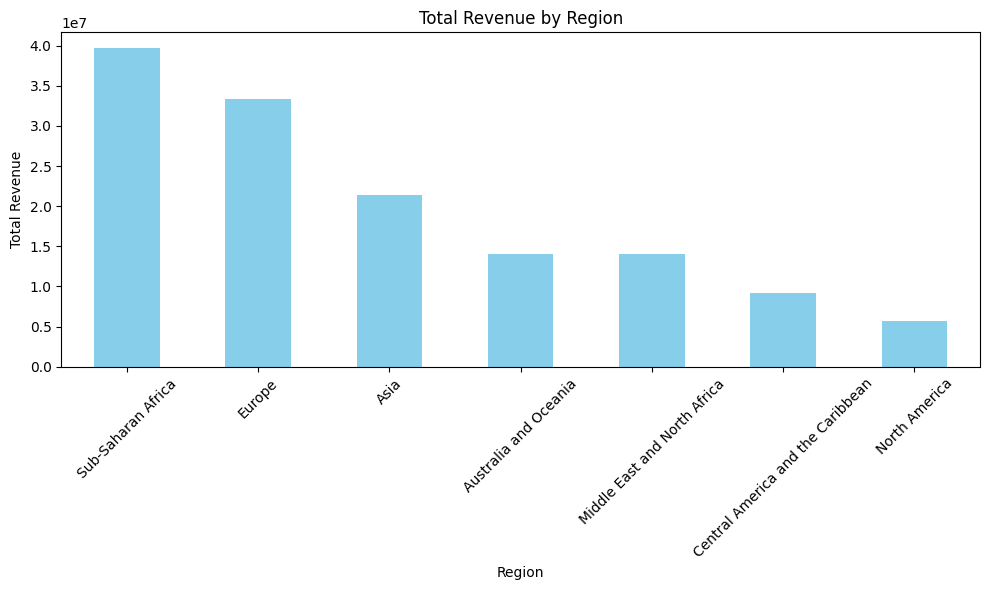

In [11]:
# Explore distribution of sales across different regions
region_sales = df.groupby('Region', observed=False)['Total Revenue']\
                                        .sum()\
                                        .sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

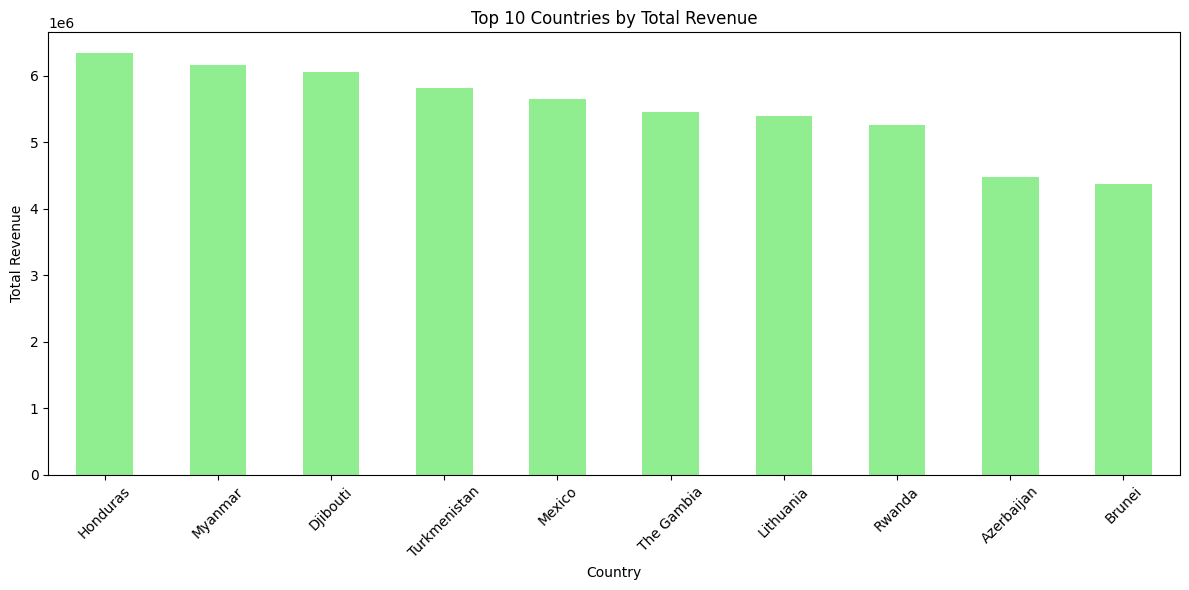

In [12]:
# Explore distribution of sales across different countries
country_sales = df.groupby('Country')['Total Revenue'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

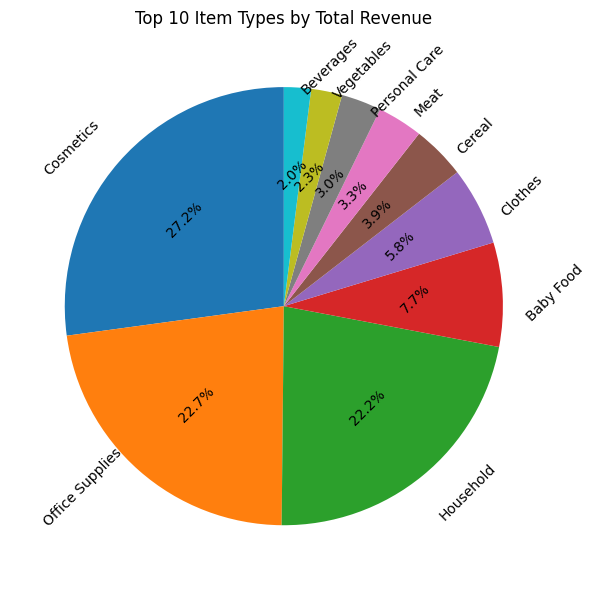

In [13]:
# Explore distribution of sales across different item types
item_type_sales = df.groupby('Item Type',observed=False)['Total Revenue'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
pie_chart = item_type_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, labeldistance=1.1)
plt.title('Top 10 Item Types by Total Revenue')
plt.ylabel('')
plt.tight_layout()
for text in pie_chart.texts:
    text.set_rotation(45)
plt.show()